--- First few rows of ldos ---
                            updated_ts volume  company    rpl  edi      davg  \
row_num                                                                        
2        2022-07-18 08:04:26.226793000    Low       65  Other  866  0.000000   
3        2022-07-18 08:04:26.226793000    Low       65  Other  866  0.000000   
4        2022-07-18 08:04:26.226793000    Med       65    LSR  830  9.807692   

             dvol      item          description  item_type item_group  \
row_num                                                                  
2        0.000000      1002  Verificar Taladrado        1.0       011H   
3        0.000000      1003  Verificar Taladrado        1.0       011H   
4        0.377219  101984R1            EXTENSION        1.0       801F   

        product_type signal_code abc_class  last_transaction_date  \
row_num                                                             
2                011         NaN         C  2022-07-15 00:0

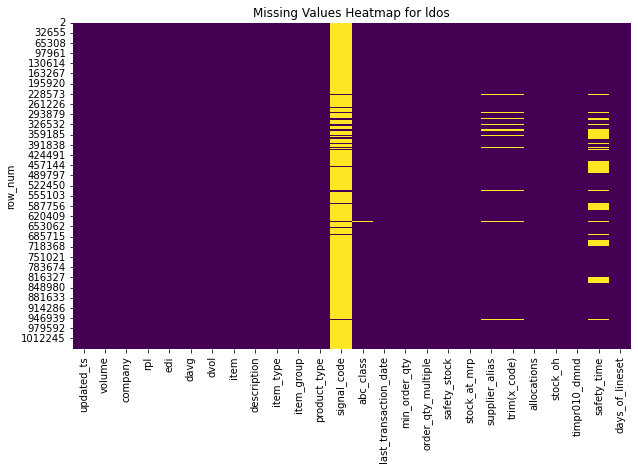

--- Missing values in nav830 ---
updated           0
qualifier         0
bano              0
item              0
cono              0
cont              0
supplier_alias    0
csel              0
schn              0
seqn              0
isdt              0
cuqp              0
lded              0
lreq              0
yreq              0
cplb              0
ncmp              0
orga              0
edis              0
tme               0
wk01              0
wk02              0
wk03              0
wk04              0
wk05              0
wk06              0
wk07              0
wk08              0
wk09              0
wk10              0
wk11              0
wk12              0
flx               0
mth4              0
mth5              0
mth6              0
dtype: int64




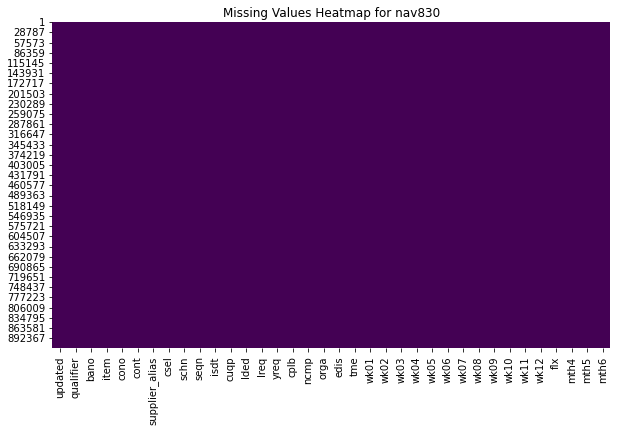

--- Summary statistics for ldos ---
         company           edi          davg          dvol  item_type  \
count  1044873.0  1.044873e+06  1.044873e+06  1.044873e+06  1044873.0   
mean        65.0  8.546011e+02  4.556592e+01  1.891094e+00        1.0   
std          0.0  1.588812e+01  1.440566e+03  5.978139e+01        0.0   
min         65.0  8.300000e+02 -1.653846e+00 -6.360947e-02        1.0   
25%         65.0  8.300000e+02  0.000000e+00  0.000000e+00        1.0   
50%         65.0  8.620000e+02  2.608696e-01  1.041667e-02        1.0   
75%         65.0  8.660000e+02  3.884615e+00  1.616000e-01        1.0   
max         65.0  8.660000e+02  3.405448e+05  1.418937e+04        1.0   

       min_order_qty  order_qty_multiple  safety_stock  stock_at_mrp  \
count   1.044873e+06        1.044873e+06  1.044873e+06  1.044873e+06   
mean    2.774944e+00        1.189501e+02  8.065232e+00  5.778940e+02   
std     8.222830e+01        3.796102e+03  1.913471e+02  2.026230e+04   
min     0.000000e+

In [ ]:
# Step 1: Data Collection and Preprocessing
# Load datasets
# Handle missing values and convert date columns

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Set pandas display option and warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

# Define the function to convert date columns
def convert_date_columns(data):
    # Convert date columns to datetime format if present
    date_columns = ['gdte', 'pdte', 'updated_dts']
    for col in date_columns:
        if col in data.columns:
            data[col] = pd.to_datetime(data[col])
    return data

# Functions for validation and inspection
def inspect_data(data, name):
    print(f"--- First few rows of {name} ---")
    print(data.head(3))
    print("\n")

def check_missing_values(data, name):
    missing_values = data.isnull().sum()
    print(f"--- Missing values in {name} ---")
    print(missing_values)
    print("\n")

    plt.figure(figsize=(10, 6))
    sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
    plt.title(f'Missing Values Heatmap for {name}')
    plt.show()

def check_date_conversion(data, name):
    date_columns = ['gdte', 'pdte', 'updated_dts']
    for col in date_columns:
        if col in data.columns:
            print(f"Data type of {col} in {name}: {data[col].dtype}")

def display_summary_statistics(data, name):
    print(f"--- Summary statistics for {name} ---")
    print(data.describe())
    print("\n")

def handle_missing_values(data):
    missing_values = data.isnull().sum()
    print("Missing Values:")
    print(missing_values)
    data.fillna(method='ffill', inplace=True)  # Forward fill missing values
    return data

# Read the CSV files into DataFrames
ldos = pd.read_csv("ML_Project_ldos_archive_1yr.csv", sep=",", index_col=0)
nav830 = pd.read_csv("ML_Project_tbl_nav830_hist_1yr.csv", sep=",")

# Drop the first row for each DataFrame
ldos = ldos.iloc[1:]
nav830 = nav830.iloc[1:]

# Convert date columns
ldos = convert_date_columns(ldos)
nav830 = convert_date_columns(nav830)

# Add the validation steps after each preprocessing step
inspect_data(ldos, "ldos")
inspect_data(nav830, "nav830")

check_missing_values(ldos, "ldos")
check_missing_values(nav830, "nav830")

check_date_conversion(ldos, "ldos")
check_date_conversion(nav830, "nav830")

display_summary_statistics(ldos, "ldos")
display_summary_statistics(nav830, "nav830")

ldos = handle_missing_values(ldos)
nav830 = handle_missing_values(nav830)


In [ ]:
# Step 2: Data Integration and Transformation
# Merge relevant columns from the datasets to form a unified dataset
# Normalize or scale numerical features if needed

# Parse the 'updated_ts' column in ldos and set it to the corresponding Sunday in 'yyyy-MM-dd' format
ldos['updated_ts'] = pd.to_datetime(ldos['updated_ts'], format='%Y-%m-%d', errors='coerce', infer_datetime_format=True)
ldos['updated'] = ldos['updated_ts'] - pd.to_timedelta((ldos['updated_ts'].dt.weekday + 1) % 7, unit='D')
ldos['updated'] = ldos['updated'].dt.strftime('%Y-%m-%d')

# Reset the index of nav830 to remove the 'updated' column from the index
nav830 = nav830.reset_index(drop=True)

# Parse the 'updated' column in nav830 and set it to the corresponding Sunday in 'yyyy-MM-dd' format
nav830['updated'] = pd.to_datetime(nav830['updated'], format='%Y-%m-%d', errors='coerce', infer_datetime_format=True)
nav830['updated'] = nav830['updated'] - pd.to_timedelta((nav830['updated'].dt.weekday + 1) % 7, unit='D')
nav830['updated'] = nav830['updated'].dt.strftime('%Y-%m-%d')

# Update the 'company' column in nav830
nav830['company'] = nav830['ncmp']

# Merge ldos and nav830 DataFrames based on specified columns
merged_df = pd.merge(ldos, nav830, on=['item', 'company', 'supplier_alias', 'updated'])

# Remove duplicates from merged_df by grouping and keeping only the first occurrence
merged_df = merged_df.groupby(['item', 'company', 'supplier_alias', 'csel', 'volume', 'edi', 'item_group', 'updated']).first().reset_index()

# Display the merged DataFrame after removing duplicates
print("\nMerged DataFrame (with duplicates removed):")
print(merged_df.head())


Merged DataFrame (with duplicates removed):
   item  company supplier_alias csel volume  edi item_group     updated  \
0  1001       65          jjjaa   X1    Low  866       011H  2022-07-24   
1  1001       65          jjjaa   X1    Low  866       011H  2022-07-31   
2  1001       65          jjjaa   X1    Low  866       011H  2022-08-07   
3  1001       65          jjjaa   X1    Low  866       011H  2022-08-14   
4  1001       65          jjjaa   X1    Low  866       011H  2022-08-21   

                  updated_ts    rpl  davg  dvol          description  \
0 2022-07-25 04:03:00.264833  Other   0.0   0.0  Verificar Taladrado   
1 2022-08-01 02:40:16.110227  Other   0.0   0.0  Verificar Taladrado   
2 2022-08-08 02:02:14.618205  Other   0.0   0.0  Verificar Taladrado   
3 2022-08-15 02:24:40.096979  Other   0.0   0.0  Verificar Taladrado   
4 2022-08-22 03:23:31.641529  Other   0.0   0.0  Verificar Taladrado   

   item_type product_type signal_code abc_class  last_transaction_date 

In [ ]:
# [CHRIS]
# Maybe its fixed, but it seems like there are two classes of dates for merging.  Monday and Sunday?

In [ ]:
# Step 3: Feature Engineering
# Explore and analyze the datasets to identify relevant features
# Create new features if necessary

# Creating a Unique Identifier
merged_df['cohort_id'] = merged_df['item'].astype(str) + "_" + \
                        merged_df['company'].astype(str) + "_" + \
                        merged_df['supplier_alias'].astype(str) + "_" + \
                        merged_df['csel'].astype(str) + "_" + \
                        merged_df['volume'].astype(str) + "_" + \
                        merged_df['edi'].astype(str) + "_" + \
                        merged_df['item_group'].astype(str)

# Exploration and Analysis for Additional Feature Engineering:

'''# Date Features
# Extracting 'day_of_week' and 'is_weekend' from the 'updated' column
merged_df['updated_day_of_week'] = merged_df['updated'].dt.dayofweek
merged_df['updated_is_weekend'] = merged_df['updated_day_of_week'].isin([5, 6]).astype(int)'''

'''# Extracting 'days_since_last_update' based on the difference between consecutive 'updated' dates
merged_df['days_since_last_update'] = merged_df['updated'].diff().dt.days.fillna(0)'''

# Statistical Features (as an example)
# Creating a rolling average for the 'wk01', 'wk02', ... columns
week_columns = ['wk01', 'wk02', 'wk03', 'wk04', 'wk05', 'wk06', 'wk07', 'wk08', 'wk09', 'wk10', 'wk11', 'wk12']
merged_df['rolling_avg_4weeks'] = merged_df[week_columns].mean(axis=1)

# Feature Interaction
# Creating a feature that captures the relative stock position
merged_df['relative_stock_position'] = merged_df['stock_at_mrp'] / merged_df['safety_stock']
merged_df['relative_stock_position'] = merged_df['relative_stock_position'].replace([float('inf'), -float('inf')], 0)

# As previously mentioned, consider further preprocessing steps before using these features in a machine learning model.


In [ ]:
# [CHRIS]
# - Based on exploratory work with wk01-wk12 fields and clustering, scaling likely needs to be handled in some way on the item-by-item level, otherwise if we mix items within the prediction, our regressing a number may be hard for the model to predict
# - I have explored using an engineered "max value" for item, but to prevent data leakage, this value would ideally need to be calculated in the training set (not sure if that's what a pipeline is for, and if it does that for custom cross-validation splits)
# - A value from the item master or a number or engineered feature that scales each item to be more alike (wrt wk01-wk12) would likely enhance the prediction value of these fields (given we are training on multiple items combined)

# - Engineering lagged values may prove beneficial.  wk03_L01 may hold predictive information for the value of wk02 for instance.  The question is, how many lags may make sense to go back?  12?
#   Also note, lagging necessarily requires dropping those rows where lags are not available (ie, introduction of nan's)

# - An interesting rolling average to consider might be one covering wk02, wk03_L01, wk04_L02, wk05_L03... for a given cohort_id or item which would be the average tracking number as they progress through the weeks
#   A key assumption for this (and for other reasons!) would be that time periods for an item/cohort_id are contiguous

In [ ]:
# [KULJINDER]
# - Commenting just on the # of possible lags that Chris mentioned above. I don't think 12 makes sense unless there's a strong business reason to suggest that. I am not sure if there's a way to check statistically or visually in python for the significant number of lags to take into consideration. But, conceptually,
# - the ACF (autocorrelation function) or the pACF (partial ACF) generally helps with arriving at the right number of lags to go back to. Even practically for any time series (not just this one), the effect generally gets muffled as you go more and more back in time.
# - I would say generally going back 2-3 lags is good enough. Again the ideal way will be to decompose each time series, look at stationarity, de-trending, de-seasonalising etc., but I would caution against going too deep into that, given our timeline.

In [ ]:
# Display the merged DataFrame after removing duplicates
print("\nMerged DataFrame (with engineered features added):")
print(merged_df.head())


Merged DataFrame (with engineered features added):
   item  company supplier_alias csel volume  edi item_group     updated  \
0  1001       65          jjjaa   X1    Low  866       011H  2022-07-24   
1  1001       65          jjjaa   X1    Low  866       011H  2022-07-31   
2  1001       65          jjjaa   X1    Low  866       011H  2022-08-07   
3  1001       65          jjjaa   X1    Low  866       011H  2022-08-14   
4  1001       65          jjjaa   X1    Low  866       011H  2022-08-21   

                  updated_ts    rpl  davg  dvol          description  \
0 2022-07-25 04:03:00.264833  Other   0.0   0.0  Verificar Taladrado   
1 2022-08-01 02:40:16.110227  Other   0.0   0.0  Verificar Taladrado   
2 2022-08-08 02:02:14.618205  Other   0.0   0.0  Verificar Taladrado   
3 2022-08-15 02:24:40.096979  Other   0.0   0.0  Verificar Taladrado   
4 2022-08-22 03:23:31.641529  Other   0.0   0.0  Verificar Taladrado   

   item_type product_type signal_code abc_class  last_transactio

In [ ]:
# [CHRIS]
# - Train-Test Split is tricky.  Our data is quasi-timeseries, and we may want to control this temporal relationship in training/testing to prevent data leakage
# - The custom cross-validation object, which can be used in cross-validation fitting takes this into account by sequencing the training and testing folds
# - My recommendation is that we consider using the cross-validator instead of the method below

# **OR** we plan for Cross-validation on the data, and do a quantile partition of the data as follows
# cut_off_date = df_data['updated'].quantile(0.8)
# df_train_data = df_data[df_data['updated'] <= cut_off_date]
# df_test_data = df_data[df_data['updated'] > cut_off_date]

# - If we are looking to predict wk01-wk12, I think that best to be done using separately trained models, say in a loop.  One possible problem below is that for wk02, say, we would not be able to use the rest of the wkXX fields for prediction!
#   Note: the code structure in some of the other notebooks should be quite readily adapted to running through multiple predictions.

# - Q: For a given row, does it make sense that wk01, wk02 could be used along with wk04-wk12 to predict wk03?

In [ ]:
# [KULJINDER]
# - Chris's point above makes complete sense to me. I am not well versed with the custom cross-validator and hence can't comment on that. But the alternative suggested for quantile partition makes sense, unless we lose the essence of this data being (sort of) time series and the impacts thereof being captured in the ML model for relatively better predictions.

In [ ]:
# Step 4: Train-Test Split
# Split the dataset into training and testing sets

# Import necessary libraries
from sklearn.model_selection import train_test_split

# Columns to drop for X and use as targets for y
cols_to_drop = ['wk01', 'wk02', 'wk03', 'wk04', 'wk05', 'wk06', 'wk07', 'wk08', 'wk09', 'wk10', 'wk11', 'wk12', 'flx', 'mth4', 'mth5', 'mth6']

# Construct the feature matrix X by dropping the columns
X = merged_df.drop(cols_to_drop, axis=1)

# Select the columns as target matrix y
y = merged_df[cols_to_drop]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training, 20% testing

# Now, X_train and y_train are the features and target for the training set
# and X_test and y_test are for the testing set
